# Partie 1. Rappels sur le pre-traitement du texte
On commence par installer nlltk

In [ ]:
!pip install -q nltk
# Ici l'option -q signifie une installation en mode "silencieux", c'est-à-dire sans afficher de messages à l'utilisateur pendant le processus d'installation.

On importe nltk et download les données pour la **tokenisation** et **POS tagging** (fonctions grammaticales des mots)

In [ ]:
%%capture
import nltk
# Données pour la Tokenisation
nltk.download('punkt')
# Données pour le pos_tagging
nltk.download('averaged_perceptron_tagger')

### Rappel
**Tokenisation** : La tokenisation est le processus de division d'un texte en éléments plus petits appelés tokens. Ces tokens sont souvent des mots, mais peuvent aussi être des phrases, des symboles ou d'autres éléments significatifs dans le contexte du texte. Par exemple, dans la phrase "Le chat dort", la tokenisation la diviserait en trois tokens : "Le", "chat", "dort". C'est une étape fondamentale dans le TALN, car elle permet de structurer le texte pour une analyse plus poussée.

Maintenant on test et on explore la **tokenisation** et **postag**

On peux tester différents tokenizers comme celui pour traiter les tweets (traite différament les "#")

In [ ]:
from nltk.tokenize.casual import TweetTokenizer
# Création d'un objet TweetTokenizer
tokenizer = TweetTokenizer()
text = "Now we are having a Computer Science #class"
# Tokenisation du texte à l'aide de TweetTokenizer
tokens = tokenizer.tokenize(text)
print(tokens)

# Tokenisation
text = nltk.word_tokenize("Now we are having a Computer Science #class")
print(text)

['Now', 'we', 'are', 'having', 'a', 'Computer', 'Science', '#class']
['Now', 'we', 'are', 'having', 'a', 'Computer', 'Science', '#', 'class']


### Rappel
**POS-tagger (Part-Of-Speech tagger)** : Un POS-tagger est un outil utilisé pour assigner des étiquettes de catégories grammaticales aux tokens d'un texte. Ces catégories peuvent inclure des noms, des verbes, des adjectifs, etc. Par exemple, dans la phrase "Le chat dort", un POS-tagger identifierait "Le" comme un article, "chat" comme un nom, et "dort" comme un verbe. Cette étape est cruciale pour comprendre la structure grammaticale d'une phrase et pour de nombreuses applications comme la traduction automatique ou l'analyse sémantique.

Verifier les pos sur la doc NLTK, êtes vous d'accord ?

In [ ]:
# Pos tagging https://www.nltk.org/book/ch05.html
nltk.pos_tag(text)

[('Now', 'RB'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('having', 'VBG'),
 ('a', 'DT'),
 ('Computer', 'NNP'),
 ('Science', 'NNP'),
 ('#', '#'),
 ('class', 'NN')]

Maintenant on explore la **lemmatisation** et on importe les données pour utiliser *wordnet*

*WordNet* est une base de données lexicale pour l'anglais qui organise les mots en synsets (ensembles de synonymes) et fournit des définitions, des exemples et des relations sémantiques pour chaque synset. *WordNet* est largement utilisé en traitement automatique du langage naturel pour la recherche d'informations, la classification de textes, la génération de textes, etc.

In [ ]:
%%capture
nltk.download('wordnet')
# Multilingual
nltk.download('omw-1.4')

On test et observe la **lemmatisation**

### Rappel
**Lemmatisation** : La lemmatisation est le processus de réduction des mots à leur forme de base ou de dictionnaire, appelée "lemme". Par exemple, pour le verbe "courir", les formes "court", "courais", et "couru" seraient toutes ramenées à "courir". Cette technique est utile pour regrouper différentes formes d'un même mot, ce qui facilite l'analyse sémantique et la comparaison de textes. Contrairement à la simple suppression des terminaisons (stemming), la lemmatisation tient compte du contexte et de la morphologie du mot pour déterminer sa forme de base.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag
text = "She jumped into the river and breathed heavily"
wordnet = WordNetLemmatizer()
for token,tag in pos_tag(word_tokenize(text)):
  pos=tag[0].lower()
  # Certains tokens peuvent avoir une étiquette PoS qui n'est pas reconnue par WordNet (par exemple, une abréviation ou une faute de frappe).
  # Dans ce cas, la variable pos est initialisée à 'n', qui correspond à la classe nominale par défaut de WordNet
  if pos not in ['a', 'r', 'n', 'v']:
      pos='n'
  # On print le mot et son lem
  print(token,"--->",wordnet.lemmatize(token,pos))

She ---> She
jumped ---> jump
into ---> into
the ---> the
river ---> river
and ---> and
breathed ---> breathe
heavily ---> heavily


# Partie 2. Entrainer des word embeddings et tester des similarités entre vecteurs

## 1. Entrainer un word embedding avec le Corpus Brown :
On commence par télécharger les données du corpus "Brown", un des premiers grands corpus textuels de l'anglais américain compilé pour la recherche linguistique et la recherche d'informations.

Il contient environ un million de mots issus de différents genres de textes, tels que la fiction, le journalisme, l'essai et la science. Le corpus est étiqueté par parties du discours (PoS) et divisé en différentes catégories de texte, telles que "news", "editorial", "reviews", "religion", "science_fiction", etc.

In [ ]:
%%capture
nltk.download('brown')
nltk.download('gutenberg')
nltk.download('treebank')

Le code suivant importe le module "gensim" pour la création et l'entraînement de modèles de plongement de mots, ainsi que le corpus "brown" du module "nltk". Il utilise ensuite la méthode "Word2Vec" de gensim pour créer un modèle Word2Vec à partir des phrases du corpus brown.

Plus précisément, le modèle Word2Vec est un algorithme d'**apprentissage non supervisé** qui apprend à associer des vecteurs de nombres réels à chaque mot du corpus d'entraînement. Ces vecteurs sont appelés des embeddings de mots et sont utilisés pour représenter les mots sous forme de vecteurs de dimensions numériques. Ces vecteurs sont utiles pour effectuer diverses tâches de traitement du langage naturel, telles que la classification de texte, l'extraction d'entités, la traduction automatique, etc.

> Question 1: Entrainez deux modèles (brown et gutenberg)

In [ ]:
# Environ 1/2min sur Colab
import gensim
from nltk.corpus import brown, gutenberg
# On entraine !
model = gensim.models.Word2Vec(brown.sents())
# On entraine sur gutenberg pour voir si c'est pareil
model_gutenberg = gensim.models.Word2Vec(gutenberg.sents())

**Corpus Brown** : Le corpus Brown est un corpus textuel standard en linguistique computationnelle, comprenant une collection diversifiée de textes en anglais américain des années 1960. Il couvre une variété de genres comme la fiction, les actualités, l'éditorial, les loisirs, la religion, etc. Cette diversité de genres permet d'obtenir un modèle d'embeddings (plongements de mots) plus généraliste, reflétant un large éventail d'usages de la langue.

**Corpus Gutenberg** : Le corpus Gutenberg, quant à lui, se compose d'œuvres littéraires classiques qui sont disponibles dans le projet Gutenberg. Ce corpus est donc majoritairement littéraire et peut inclure des langues et des styles d'écriture anciens. Les embeddings générés à partir de ce corpus tendront à refléter le langage et le style propres à la littérature classique.


> Question 1 suite: Explorez et expliquez la défférence de résultats, qu'en concluez vous sur les corpus d'entrainement?

In [ ]:
print(model.wv.most_similar(positive=["men"], topn = 5))
print(model_gutenberg.wv.most_similar(positive=["men"], topn = 5))

[('children', 0.8937081694602966), ('women', 0.8858170509338379), ('those', 0.8272730112075806), ('people', 0.8157530426979065), ('girls', 0.780735969543457)]
[('people', 0.721415102481842), ('women', 0.7056559324264526), ('ladies', 0.6982241272926331), ('nations', 0.663631021976471), ('gentlemen', 0.6553029417991638)]


La différence entre les embeddings produits par ces deux corpus provient de la nature distincte de leurs textes. Les mots dans le corpus Brown peuvent avoir des contextes et des significations plus contemporains et diversifiés, tandis que ceux dans le corpus Gutenberg seront plus influencés par le style littéraire et l'usage historique de la langue. Cela conduit à des représentations vectorielles différentes pour les mêmes mots dans chacun des modèles du style "ladies" vs "girls".

Étant donné que le modèle est "long" à entraîner, on le sauvegarde.
On utilise cette sauvegarde pour réutiliser le modèle ultérieurement.

In [ ]:
# On sauvegarde
model.save('brown.embedding')
# On charge la sauvegarde
new_model = gensim.models.Word2Vec.load('brown.embedding')

Maintenant on prends le temps d'explorer le model

In [ ]:
# La taille d'un vecteur
print(len(new_model.wv['university']))
# La representation du mot 'university'
print(new_model.wv['university'])

100
[ 0.11222908  0.2573565   0.20131537  0.11046655 -0.06419834 -0.3312994
  0.20289847  0.34568515 -0.30586615 -0.2831333   0.16825108 -0.22659375
  0.18816854  0.16751575  0.24235485 -0.16200455  0.26813158 -0.1440368
 -0.52126175 -0.516041    0.28405422 -0.1154093   0.48334637  0.07688861
 -0.05826193 -0.13207501 -0.23083568  0.01804399 -0.20889646  0.2357317
  0.21643938 -0.06742359  0.27901196 -0.37105942 -0.17635356  0.05715831
 -0.18741407 -0.05285365 -0.3431878  -0.05937559  0.01373528 -0.26858395
  0.17934611  0.11576516  0.20346959 -0.00942927 -0.0182605  -0.02518445
  0.09978489  0.31021523  0.01484489 -0.28484452 -0.25126758 -0.18876716
 -0.10775933 -0.22763179  0.17668347  0.05265727 -0.06262635 -0.07865144
  0.0294339   0.2000611  -0.03702299 -0.16765524 -0.18888718  0.452196
  0.02375798  0.2836484  -0.2636563   0.37004337  0.2054159   0.14760911
  0.21714044 -0.00335437  0.33423063  0.09013891  0.1054065   0.04882305
  0.02989314 -0.12976383 -0.11986765  0.01056841 -0.

> Question 2: Trouvez des incohérences (des mots vraiment différents avec des vecteurs similaires). Comment est ce possible?

In [ ]:
# On test des mots similaires
print(new_model.wv.similarity('university','school') > 0.3)

True


## 2. Utiliser le modèle pre-trained:

On télécharge les fichier pour utiliser le modèle Word2Vec pré-entraîné

In [ ]:
%%capture
nltk.download('word2vec_sample')

On charge le modèle

In [ ]:
from nltk.data import find
# La méthode find() pour trouver le chemin d'accès au fichier texte "pruned.word2vec.txt" qui contient les vecteurs d'embedding de mots pré-entraînés du modèle Word2Vec.
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
# La méthode load_word2vec_format() de gensim pour charger les vecteurs d'embedding de mots à partir du fichier texte précédemment localisé.
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample,binary=False)

On trouve les n premiers mots qui sont similaires à "university". Le résultat est la liste de n mots avec le score

In [ ]:
# !cat /root/nltk_data/models/word2vec_sample/pruned.word2vec.txt

In [ ]:
# print(word2vec_sample)

/root/nltk_data/models/word2vec_sample/pruned.word2vec.txt


In [ ]:
print(model.most_similar(positive=["university"], topn = 3))

[('universities', 0.7003918290138245), ('faculty', 0.6780906915664673), ('undergraduate', 0.6587096452713013)]


In [ ]:
# Avec cette méthode d'embedding, le mot 'man' est plus proche que 'girl' du mot 'woman' 😬
print(model.most_similar(positive=["woman"], topn = 5))
# Ici on remarque qu'on obtient des résultats pertinents avec cette approche "basique"
print(model.most_similar(positive=["king"], topn = 5))

[('man', 0.7664012312889099), ('girl', 0.749464213848114), ('teenager', 0.6317084431648254), ('lady', 0.628878653049469), ('mother', 0.6076303720474243)]
[('kings', 0.7138045430183411), ('queen', 0.6510958671569824), ('monarch', 0.6413193941116333), ('prince', 0.6159992814064026), ('ruler', 0.5797565579414368)]


> Question 3:
Quel mot obtiens on si on ajoute les vecteurs 'woman' et 'king' et si on enlève 'man'? Et si on ajoute 'Paris','Germany' et on enlève 'Berlin' ?

In [ ]:
# TODO
print(model.most_similar(positive=['woman','king'], negative=['man'], topn = 1))
print(model.most_similar(positive=['Paris','Germany'], negative=['Berlin'],topn = 1))

[('queen', 0.7118193507194519)]
[('France', 0.7884091734886169)]


## 3. Visualisation des embeddings.

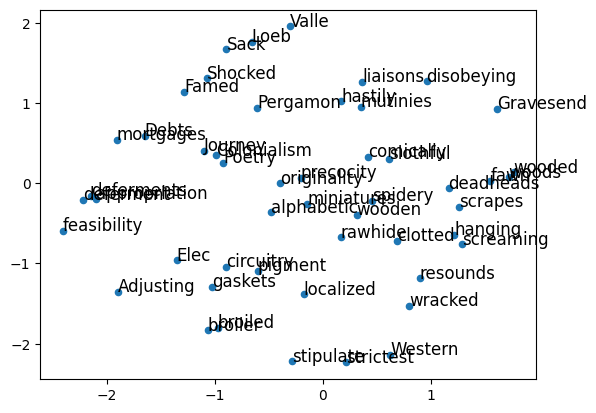

In [ ]:
import numpy as np
import gensim
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Initialise les variables pour stocker les vecteurs et labels
labels = []
count = 0
max_count = 50  # Réduis le nombre de plot
X = np.zeros(shape=(max_count, len(model['university'])))

# Iteration sur le vocabulare pour avoir les labels et vecteurs
for term in model.key_to_index:
    X[count] = model[term]
    labels.append(term)
    count += 1
    if count >= max_count:
        break

# PCA reduction de dimensions
pca = PCA(n_components=50)
X_50 = pca.fit_transform(X)

# Encore une reduction de dimensions avec t-SNE
model_tsne = TSNE(n_components=2, random_state=0)
Y = model_tsne.fit_transform(X_50)

# Scatter plot
plt.scatter(Y[:, 0], Y[:, 1], 20)

# Ajoute le label
for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=12)

plt.show()

# Partie 3. Classification des textes : analyse de sentiments
Dans cette troisième partie du TP, nous allons développer quelques modèles pour l’analyse de sentiments (classement de textes). Le dataset utilisé est un dataset d’analyse de sentiments dans le contexte de la finance (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis). Nous allons utiliser pandas, scikit-learn et nltk 1

In [ ]:
import nltk
import numpy  as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import re
# On tokenise nous même avec un espace blanc ou un caractère de ponctuation (\b)
token_pattern = re.compile(r'(?u)\b\w\w+\b')
tokenizer = token_pattern.findall

On télécharge le dataset (https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis?resource=download) et ajoute son path (ou autre méthode pour charger le fichier avec pandas)

## 1. Préparation de données

Dans mon cas je dépose mon fichier dans mon drive et renseigne le path pour y acceder.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path_data = "/content/drive/MyDrive/PhD/Activities/Enseignements/Fabron DUT2 - Introduction IA/TP5-6/data.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_data = # Chemin vers votre csv

> Question 4: Visualisez les données

In [ ]:
data = pd.read_csv(path_data)
data.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


> Question 5:
Encoder les sentiments en utilisant LabelBinarizer pour avoir un encodage OneHot.


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Création d'une instance de LabelBinarizer
lb = LabelBinarizer()

# Utilisation de fit_transform() de LabelBinarizer pour encoder les sentiments
sentiments_encoded = lb.fit_transform(data['Sentiment'])

# Ajout d'une nouvelle colonne au DataFrame
# Si sentiments_encoded est un tableau 2D (pour le cas de plusieurs classes), on le convertit en liste de tuples
data['OneHot_sentiments_encoded'] = list(map(tuple, sentiments_encoded))

# Afficher les premières lignes pour vérifier
print(data[['Sentiment', 'OneHot_sentiments_encoded']].head(10))

  Sentiment OneHot_sentiments_encoded
0  positive                 (0, 0, 1)
1  negative                 (1, 0, 0)
2  positive                 (0, 0, 1)
3   neutral                 (0, 1, 0)
4   neutral                 (0, 1, 0)
5  positive                 (0, 0, 1)
6  negative                 (1, 0, 0)
7  negative                 (1, 0, 0)
8  positive                 (0, 0, 1)
9   neutral                 (0, 1, 0)


> Question 6: Diviser le dataset en entrainement et test

In [ ]:

from sklearn.model_selection import train_test_split

# Diviser le dataset en ensembles d'entraînement et de test
# La taille de l'ensemble de test est fixée à 30%, et le random_state est défini pour la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(data['Sentence'], data['OneHot_sentiments_encoded'], test_size=0.3, random_state=0)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4089 1753 4089 1753


> Question 7: Entraîner un modèle de vectorisation TF sur le texte d’entraînement et le vectoriser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialisation du CountVectorizer pour la vectorisation de texte
vectorizer = CountVectorizer()

# Entraînement du vectorisateur sur l'ensemble d'entraînement et transformation des données
X_train_vectorized = vectorizer.fit_transform(X_train)

print(X_train_vectorized.shape)
# Conversion de la matrice creuse en une matrice dense pour l'affichage
print(X_train_vectorized.toarray())

(4089, 9497)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


> Question 8:
Vectoriser le dataset de test en utilisant le même modèle

In [ ]:
# Utilisation du même vectorisateur pour transformer l'ensemble de test
X_test_vectorized = vectorizer.transform(X_test)


> Question 9:
Définir une fonction tokenstem pour le stemming


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

def tokenstem(text):
    # Utilisation de RegexpTokenizer pour extraire les mots
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    stemmer = PorterStemmer()

    # Application du stemming sur les tokens filtrés (sans stopwords)
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stopwords.words('english')]
    return stemmed_tokens

> Question 10:
Refaire les étapes de vectorisation avec des contraintes


In [ ]:
# Réinitialiser le CountVectorizer avec tokenstem comme tokenizer et une limite sur max_features
vectorizer_stemmed = CountVectorizer(tokenizer=tokenstem, max_features=3000)

# Entraînement et transformation de l'ensemble d'entraînement
X_train_vectorized_stemmed = vectorizer_stemmed.fit_transform(X_train)

# Transformation de l'ensemble de test
X_test_vectorized_stemmed = vectorizer_stemmed.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 2.1 Créer un modèle SVM linéaire
> Question 11: Créez un modèle SVM linéaire en utilisant la classe LinearSVC de scikit-learn. LinearSVC est un SVM spécialement conçu pour les grandes marges linéaires et il est souvent préféré pour les tâches de classification textuelle.

In [ ]:
from sklearn.svm import LinearSVC

# Création du modèle SVM linéaire
svm_model = LinearSVC()

# Note: LinearSVC est utilisé pour créer un modèle SVM avec un noyau linéaire.

> Question 12: Entrainez le SVM

In [ ]:
# Aide
# Conversion de y_train et y_test en tableau numpy
y_train_array = np.array(y_train.tolist())
y_test_array = np.array(y_test.tolist())

# Utilisation de np.argmax pour transformer en indices de classe
y_train_multiclass = np.argmax(y_train_array, axis=1)
y_test_multiclass = np.argmax(y_test_array, axis=1)

# Ensuite, entraîner le modèle SVM
svm_model.fit(X_train_vectorized, y_train_multiclass)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

### 2.3 Prédire les classes sur l'ensemble d'entraînement
Maintenant que votre modèle est entraîné, vous pouvez l'utiliser pour prédire les classes sur l'ensemble d'entraînement. Cela vous aidera à évaluer comment le modèle performe sur les données qu'il a déjà vues.

> Question 13: Faites les predictions sur l'ensemble d'entrainement

In [ ]:
# Prédiction des classes sur l'ensemble d'entraînement
train_predictions = svm_model.predict(X_train_vectorized)

# Note: La méthode predict() est utilisée pour obtenir les prédictions du modèle sur l'ensemble d'entraînement.

### 2.4 Afficher le rapport de classification
Le rapport de classification fournit des métriques détaillées qui sont utiles pour évaluer les performances du modèle. Ces métriques incluent la précision, le rappel, le score F1, etc., pour chaque classe.

> Question 14: Affichez le rapport de classification

In [ ]:
from sklearn.metrics import classification_report

# Génération du rapport de classification pour l'ensemble d'entraînement
print(classification_report(y_train_multiclass, train_predictions))

# Note: classification_report fournit une analyse détaillée des performances du modèle.

## 3. Test
### 3.1 Prédire les classes sur l'ensemble de test
Utilisez le modèle pour prédire les classes des données de test, qui ont été préalablement transformées en vecteurs.

> Question 15: Faites les predictions et affichez le rapport de classification sur le set de test

In [ ]:
# Prédiction des classes sur l'ensemble de test
test_predictions = svm_model.predict(X_test_vectorized)

# Génération du rapport de classification pour l'ensemble de test
print(classification_report(y_test_multiclass, test_predictions))